# Fundamentos de Aprendizaje Automático
## _Práctica 4: Algoritmos Genéticos_
### _Grupo 1461_
#### _Rubén Torralba Manso y Alejandro Monterrubio Navarro_

Imports:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from Datos import Datos
import sklearn.preprocessing as pre
import EstrategiaParticionado as EstrategiaParticionado
import math
import AlgoritmoGenetico as AlgoritmoGenetico
from AlgoritmoGenetico import *
from Clasificador import *
from ClasificadorKNN import *
import RegresionLogistica as rl

## Apartado 1: Breve descripción de los detalles de la implementación

### Generación de la población inicial

Este es el código:

In [ ]:
def generaPoblacion(self, dataset,diccionario):
        total = 0
        for clave in diccionario.keys():
            if clave != "Class":
                total += len(diccionario[clave].keys())
        total += 1 
        self.tam_regla = total
        tam_array = total * self.max_reglas
     
        return np.random.randint(2, size=tam_array)

Para generar la población le pasamos el diccionario, luego recorremos todas las claves del diccionario para conseguir los atributos, dejando la clase aparte. Vamos contando los atributos y estos al final los establecemos como el tamaño de la regla. Para calcular el tamaño del array multiplicamos el total por el máximo de reglas. Luego rellenamos el array con numeros aleatorios para crear un individuo aleatorio con su forma, esto se repite el número de veces necesario para tener el tamaño que queremos que tenga la población.

### Mecanismo de cruce implementado

Este es el código:

In [ ]:
def intraReglas(self, lista_1, lista_2):
        
        lista1 = lista_1.tolist()
        lista2 = lista_2.tolist()

        indice = random.randint(0,len(lista1))
        
        listaSolucion1 = lista1[0:indice]
        listaSolucion1 += lista2[indice:]
        listaSolucion2 = lista2[0:indice]
        listaSolucion2 += lista1[indice:]

        return np.array(listaSolucion1), np.array(listaSolucion2)

Hemos implementado el algoritmo de cruce intraReglas, este consiste en partir dos reglas enviadas por un índice aleatorio a ambas. Luego intercambiamos las partes partidas entre ellas, es decir, si tenemos las reglas [1,1,1,1,1] y [0,0,0,0,0] y partimos en el índice 2, quedarían así después del intercambio [1,1,0,0,0] y [0,0,1,1,1]. Esto lo hacemos con el fin de crear nuevas reglas que puedan obtener mejores resultados entre generaciones.

### Mecanismo de mutación implementado

Este es el código:

In [ ]:
def mutacion(self, lista):
        for indice in range(len(lista)):
            num = random.random()
            if num < self.prob_mutacion:
                lista[indice] = 1 - lista[indice]     
        
        return lista

Para la mutación lo que hacemos es que después de producir una nueva generación, se recorren los individuos, haciendo que dada una probabilidad y generando un número aleatorio, si el número es menor a la probabilidad se intercambiará el número en el que ha ocurrido. Por ejemplo, si el individuo es [1,1,0,1,0] y el número aleatorio supera el de mutación en el tercer 1, el individuo pasaría a ser: [1,1,0,0,0]. Esto igual que el cruce se hace con la intención de mejorar la clasificación. También se debe encontrar una probabilidad de mutación que produzca los mejores resultados. Conviene que la probabilidad de mutación no sea alta para tratar de mantener los resultados que hemos ido arrastrando y que por tanto han mostrado previamente buenos resultados.

### Mecanismo de clasificación implementado

El mecanismo funciona mediante la función fitness() y compareDataToRule().

La función fitness() es utilizada para calcular la aptitud de un individuo en un problema de optimización. En este caso específico, la función recibe dos argumentos: datos y individuo. La función hace lo siguiente:

1. Crea una lista vacía llamada reglas que almacenará las reglas del individuo.
2. Recorre el individuo en grupos de tamaño self.tam_regla, agregando cada grupo a la lista de reglas.
3. Llamar a la función compareDataToRule() con los datos y las reglas del individuo como argumentos, y almacena el resultado en variables acierto y error.
4. Calcula la aptitud del individuo como el cociente entre el número de aciertos y el número total de comparaciones (aciertos + errores).
5. Devuelve el valor calculado como la aptitud del individuo.

En resumen, la función fitness() se utiliza para calcular qué tan bien se desempeña un individuo en un problema de optimización dado un conjunto de datos.

El mecanismo de clasificación implementado en el código que se proporcionó se basa en el uso de reglas binarias para clasificar un conjunto de datos. La función compareDataToRule() recibe dos argumentos: un conjunto de datos y un conjunto de reglas.
Básicamente esta función se encarga de analizar que reglas del individuo se activan para cada entrada del dataset. De esta forma, por cada regla activada (ahora veremos cómo), miraremos el valor de la clase. En el caso de coexistir varias reglas en un individuo el valor mayoritario de clase será el que se tenga en cuenta para la comparación.

Para estudiar si una regla se activa hemos aprovechado la codificación que se nos propone en el enunciado junto con el One Hot Encoding que hemos aplicado sobre nuestro dataset excluyendo la clase. Así, si aplicamos una AND lógica sobre la regla y la entrada del conjunto de datos y la solución se mantiene igual a esta entrada la regla se activa. Esto es así porque hay que tener en cuenta que One Hot Encoding no es equivalente a la codificación de las reglas. Por ejemplo, para las reglas, "11" representaría que existen dos valores válidos para ese atributo mientras que esto no sería viable con OHE.

Una vez tenemos claro que reglas se activan y la comparación de las clases este método concluye devolviendo el total de errores y aciertos del dataset con respecto a nuestro individuo.

La implementación del método quedaría por lo tanto de la siguiente manera:

1. Para cada dato en el conjunto de datos, se recorre el conjunto de reglas y se comparan los valores binarios del dato con los valores binarios de la regla. 
2. Si todos los valores binarios del dato coinciden con los valores binarios de la regla, se cuenta como un acierto si el último valor binario de la regla coincide con el último valor binario del dato, y se cuenta como un error en caso contrario. 
3. Finalmente, se devuelve el número de aciertos y el número de errores.

Este mecanismo de clasificación es simple y eficiente, y se puede utilizar para resolver una amplia variedad de problemas de clasificación binaria. Sin embargo, es posible que no sea la mejor opción en todos los casos, ya que depende completamente de las reglas que se utilicen para clasificar los datos.

## Apartado 2: Resultados de la clasificación

### Parámetros: AlgoritmoGenético(Probabilidad mutación, Nº Generaciones, Máximo reglas, Probabilidad combinación, Tamaño de la población)

Ejecutamos la clasificación para el dataset xor.csv:

In [3]:
dataset = Datos('ConjuntosDatosP4/xor.csv')

#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 100
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 100

In [9]:
algoritmoGenetico = AG(0.01,100,5,0.85,100)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0] 

El acierto de nuestro clasificador es del: 100.0% por lo que el error es el: 0.0%


Este individuo se interpreta de la siguiente manera:
    Como ya hemos comentado previamente un individuo se compone de un número fijo de reglas. En este caso es el parámetro max_reglas el que nos determina el número de reglas por individuo. Además, una regla tiene un tamaño variable en función del dataset sobre el que nos encontremos. Concretamente, estas reglas representan los atributos de XOR por lo que, como cada atributo únicamente puede contener 2 valores, el tamaño de la regla guardará 2 bits para cada atributo + 1 de la clase, formando así un tamaño de 5 bits por regla.

Individuo = [ 1 0 0 1 0 | 0 0 0 0 0 | 0 1 0 1 1 | 1 0 1 0 1 | 0 1 1 0 0 ]

Para simplificar la discusión reducimos el individuo a un número menor de reglas. Nos quedamos con:

Regla1 = 1 0 0 1 0

Regla2 = 0 1 0 1 1

Regla3 = 1 0 1 0 1

En nuestra codificiacion el "+" se representa en el primer bit, y el menos en el segundo bit, de esta manera:

La regla 1 representaría IF (X1 = -) AND (X2 = +) THEN CLASS = +

La regla 2 representaría IF (X1 = +) AND (X2 = +) THEN CLASS = -

La regla 3 representaría IF (X1 = -) AND (X2 = -) THEN CLASS = -

La regla 4 representaría IF (X1 = +) AND (X2 = -) THEN CLASS = +

Si nos fijamos obtenemos una puerta XOR mediante estas reglas.

Este individuo particularmente no permite representar del todo las posibilidades de la codificación, más adelante veremos otro ejemplo para mostrarlo.


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 20
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 100

In [4]:
algoritmoGenetico = AG(0.01,20,5,0.85,100)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1] 

El acierto de nuestro clasificador es del: 75.0% por lo que el error es el: 25.0%


Este individuo entre otras contiene las regla [ 1 1 1 0 1 ], esta representa:

IF (X1 = + OR X1 = -) AND (X2 = +) THEN CLASS = +

#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 100
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 20

In [ ]:
algoritmoGenetico = AG(0.01,100,5,0.85,20)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0] 

El acierto de nuestro clasificador es del: 74.16666666666667% por lo que el error es el: 25.83333333333333%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 50
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 50

In [7]:
algoritmoGenetico = AG(0.01,50,5,0.85,50)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1] 

El acierto de nuestro clasificador es del: 72.5% por lo que el error es el: 27.500000000000004%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 75
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 75

In [10]:
algoritmoGenetico = AG(0.01,75,5,0.85,75)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0] 

El acierto de nuestro clasificador es del: 70.0% por lo que el error es el: 30.000000000000004%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 200
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 200

In [12]:
algoritmoGenetico = AG(0.01,200,5,0.85,200)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0] 

El acierto de nuestro clasificador es del: 100.0% por lo que el error es el: 0.0%


Como podemos observar cuando dejamos la poblacion o generaciones a un número bajo por separado se obtiene un error de alrededor del 25%, igual que si hacemos 50 individuos y 50 generaciones y por último igual para 75 individuos y 75 generaciones. Sin embargo si utilizamos 100 individuos y 100 generaciones obtendremos normalmente (no siempre) una ejecución con un muy buen resultado. Esto también ocurre con 200 individuos y generaciones pero, ya que, con 100 podemos obtenerlo es mejor dejarlo en números menores para tener un tiempo de ejecución más pequeño. También si variasemos la probabilidad de mutación o combinación podríamos obtener resultados distintos, pero esto se verá más a fondo en el apartado 3.

Ejecutamos la clasificación para el dataset titanic.csv:

In [2]:
dataset = Datos('ConjuntosDatosP4/titanic.csv')

#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 100
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 100

In [15]:
algoritmoGenetico = AG(0.01,100,5,0.85,100)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0] 

El acierto de nuestro clasificador es del: 56.86900958466453% por lo que el error es el: 43.13099041533547%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 20
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 100

In [16]:
algoritmoGenetico = AG(0.01,20,5,0.85,100)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0] 

El acierto de nuestro clasificador es del: 58.78594249201278% por lo que el error es el: 41.21405750798722%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 100
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 20

In [17]:
algoritmoGenetico = AG(0.01,100,5,0.85,20)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0] 

El acierto de nuestro clasificador es del: 64.21725239616613% por lo que el error es el: 35.78274760383386%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 50
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 50

In [18]:
algoritmoGenetico = AG(0.01,50,5,0.85,50)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1] 

El acierto de nuestro clasificador es del: 66.77316293929712% por lo que el error es el: 33.22683706070288%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 75
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 75

In [19]:
algoritmoGenetico = AG(0.01,75,5,0.85,75)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0] 

El acierto de nuestro clasificador es del: 64.21725239616613% por lo que el error es el: 35.78274760383386%


#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 200
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 200

In [20]:
algoritmoGenetico = AG(0.01,200,5,0.85,200) 
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0] 

El acierto de nuestro clasificador es del: 63.897763578274756% por lo que el error es el: 36.102236421725244%


Al contrario que para el caso anterior con xor.csv, con titanic.csv no se obtiene el mejor resultado con 100 individuos y 100 generaciones, mejora para todos los casos menores de 100 y también para 200 en individuos y generaciones, pero ya que su tiempo de ejecución ronda los 20 minutos y obtenemos incluso un mejor resultado con 50 individuos y 50 generaciones en un tiempo de alrededor de 1 minuto y medio la mejor opción sin duda es esa.

## Apartado 3: Análisis de resultados

Aunque acabamos de observar que el nº de generaciones y el tamaño de la población puede influir muchísimo en la efectividad del clasificador, aún nos quedan varios factores como el número de reglas, tamaño de población, generacioness, tasas de cruce y mutación. Asique, para ver como estos pueden variar vamos a generar nuevos ejemplos variando todos estos factores. Haremos todas las pruebas para titanic.csv, ya que es mucho más completo.

#### Probamos para:
- Probabilidad mutación: 0.4
- Nº Generaciones: 50
- Máximo reglas: 5
- Probabilidad combinación: 0.85
- Tamaño de la población: 50

Aqui vamos a probar a aumentar la prob. de mutación drásticamente:

In [3]:
algoritmoGenetico = AG(0.4,50,5,0.85,50)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1
 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1] 

El acierto de nuestro clasificador es del: 49.84025559105431% por lo que el error es el: 50.159744408945684%


Como se puede observar aumentar la probabilidad de mutación tanto solo nos traerá un error más alto, esto sucede porque cambiar números aleatoriamente a gran escala no va a generar un cambio a mejor de la clasificación general de algoritmo. Ya que, estamos tirando reglas buenas que clasifican bien cambiando muchos números de ellas.

#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 50
- Máximo reglas: 25
- Probabilidad combinación: 0.85
- Tamaño de la población: 50

Aquí aumentamos mucho el tamaño máximo de las reglas:

In [4]:
algoritmoGenetico = AG(0.01,50,25,0.85,50)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1
 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1
 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1
 

Podemos ver que aumentar considerablemente el número de reglas si que puede contribuir a una mejor clasificación, ya que a cuantas más reglas añadamos a nuestro individuo más se podrá ajustar este y será mas específico. Aunque un sobreajuste podría producir el efecto contrario.

#### Probamos para:
- Probabilidad mutación: 0.01
- Nº Generaciones: 50
- Máximo reglas: 5
- Probabilidad combinación: 0.25
- Tamaño de la población: 50

Aquí vamos a reducir la probabilidad de cruce para ver si cruzar las reglas pueden tener el efecto contrario a mejorarlo:

In [5]:
algoritmoGenetico = AG(0.01,50,5,0.25,50)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1] 

El acierto de nuestro clasificador es del: 54.9520766773163% por lo que el error es el: 45.0479233226837%


Se puede observar a simple vista que disminuir el cruce no va a ayudar tanto a un mejor algoritmo, ya que igual que estamos desperdiciando la oportunidad de conseguir reglas nuevas que sean útiles al no cruzarlas.

#### Probamos para:
- Probabilidad mutación: 0.2
- Nº Generaciones: 70
- Máximo reglas: 10
- Probabilidad combinación: 0.75
- Tamaño de la población: 40

Aquí modificamos un poco la probabilidad de mutación para que sea bastante alta, el doble de reglas, cambiamos nº generaciones y población y la probabilidad de combinación se reduce un poco:

In [6]:
algoritmoGenetico = AG(0.2,70,10,0.75,40)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0] 

El acierto de nuestro clasificador es del: 56.23003194888179% por lo que el error es el: 43.76996805111821%


Podemos observar que no ha mejorado el rendimiento con estos cambios.

#### Probamos para:
- Probabilidad mutación: 0.05
- Nº Generaciones: 55
- Máximo reglas: 8
- Probabilidad combinación: 0.9
- Tamaño de la población: 55

Vamos ahora a probar cambiando otro poco los valores:

In [7]:
algoritmoGenetico = AG(0.05,55,8,0.9,55)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

print("El mejor individuo es: ", mejor,"\n")

algoritmoGenetico.clasifica(datosTest,mejor)

El mejor individuo es:  [1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0] 

El acierto de nuestro clasificador es del: 61.34185303514377% por lo que el error es el: 38.65814696485623%


Como podemos observar también en este no hemos conseguido una mejora muy clara. Por lo tanto creemos que utilizar los parámetros recomendados en el apartado 2 es la mejor opción para conseguir que el clasificador funciones de manera correcta y sin un tiempo de ejecución excesivo.

## Apartado 4: Evolución en forma de gráfica

### Fitness del mejor individuo de la población y del mejor individuo:

Hemos decidido que en vez de hacer las gráficas por separado las vamos a realizar de manera conjunta para poder comparar la evolución de la población respecto al individuo que es seleccionado como mejor y poder ver el cambio de ambos en conjunto.

Vamos a mostrar tres líneas en la gráfica, la primera es la del mejor individuo de la población, la segunda es la media de la población y la tercera es la media de la población ordenada de menor a mayor para poder compararla con la media del mejor individuo.

Hacemos una ejecución del código y mostramos la gráfica:

Para xor.csv:

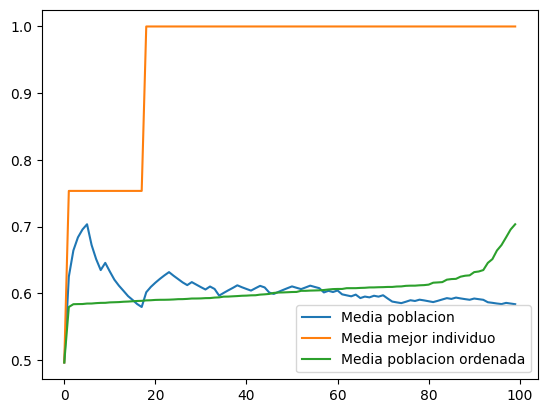

In [16]:
dataset = Datos('ConjuntosDatosP4/xor.csv')

algoritmoGenetico = AG(0.01,100,5,0.85,100)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

sortedPoblacion = np.sort(algoritmoGenetico.mediaPoblacion)
plt.plot(algoritmoGenetico.mediaPoblacion, label='Media poblacion')
plt.plot(algoritmoGenetico.mediaMejor, label='Media mejor individuo')
plt.plot(sortedPoblacion, label='Media poblacion ordenada')
plt.legend()
    
plt.show()

#### Para titanic.csv:

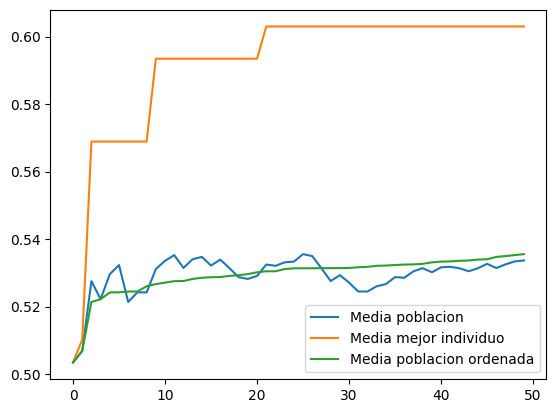

In [14]:
dataset = Datos('ConjuntosDatosP4/titanic.csv')

algoritmoGenetico = AG(0.01,50,5,0.85,50)
    
validacionSimple = EstrategiaParticionado.ValidacionSimple(30,1)
validacionSimple.creaParticiones(dataset.datos)

datosTrain = dataset.extraeDatos(validacionSimple.particiones[0].indicesTrain)
datosTest = dataset.extraeDatos(validacionSimple.particiones[0].indicesTest)

mejor = algoritmoGenetico.entrenamiento(datosTrain,{},dataset.diccionario)

sortedPoblacion = np.sort(algoritmoGenetico.mediaPoblacion)
plt.plot(algoritmoGenetico.mediaPoblacion, label='Media poblacion')
plt.plot(algoritmoGenetico.mediaMejor, label='Media mejor individuo')
plt.plot(sortedPoblacion, label='Media poblacion ordenada')
plt.legend()
    
plt.show()

Como se puede observar para ambos casos el mejor individuo no hace más que crecer hasta alcanzar su tope, mientras que la poblacion puede subir y bajar, ya que la población no tiene siempre porque mejorar en cada generación en conjunto y para todos los casos, puede empeorar, pero mejor individuo si lo va a hacer. La media de la población ordenada como se puede ver al compararla con la del mejor individuo, se ve que no llega a ni estar cerca de este, ya que el mejor individuo siempre tiene el mejor resultado y la media tiene este mejor resultado pero también muchos otros malos y que le bajan la media.